In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Match Waze and Driver incidents (A)
# Match Waze and MMDA incidents (B)
# Estimate the WAZE false alarms (C) (reliability scores of less than 6)
# Estimate Waze’s contribution D = Waze – (A union B union C)
#### Estimate the WAZE false alarms (C) (reliability scores of less than 6)
#### Estimate Waze’s contribution D = Waze – (A union B union C)

# C - Extracting false alarms from Waze Data

In [2]:
df = pd.read_csv('waze_feed.csv')
print('Total DF size',len(df))
df = df[df['Reliability'] < 6] # dataframe 'df' Where reliability is less than 6
print('False Alarms:', len(df))
df.head()
df.to_csv(r'C:\Users\Panji\Documents\Python Scripts\Non-Jupyter Py Scripts\DOTr\data\Contribution of Waze\C - Waze False Alarm.csv')

Total DF size 18508
False Alarms: 7978


### Read the CSV files and store them in a pandas dataframe.
The parameters were set to a window of 3 hours with a 500m buffer (total 1km). The CSV files used below were the output of the main script's intersection analysis module. The intersection analysis module performs a spatial joins and combined the attribute table data of point data that is within the buffer. So we are able to only capture the Waze Unique ID's that intersect with DRIVER, MMDA, and false alarm data.

In [3]:
# df_A = pd.read_csv(r'C:\Users\Panji\Documents\Python Scripts\Non-Jupyter Py Scripts\DOTr\data\Contribution of Waze\A - WazeDriver Matches.csv')
df_A = pd.read_csv(r'C:\Users\Panji\Documents\Python Scripts\Non-Jupyter Py Scripts\DOTr\data\Contribution of Waze\A - WAZEDRIVER_IntersectionAnalysis_3h_500 Meters.csv')
df_B = pd.read_csv(r'C:\Users\Panji\Documents\Python Scripts\Non-Jupyter Py Scripts\DOTr\data\Contribution of Waze\B - WAZEMMDA_IntersectionAnalysis_3h_500 Meters.csv')
df_C = pd.read_csv(r'C:\Users\Panji\Documents\Python Scripts\Non-Jupyter Py Scripts\DOTr\data\Contribution of Waze\C - Waze False Alarm.csv')

# Identify which is the column containing the unique Waze ID
Too many columns, so I just check the file in Excel. Manually rename the target columns (Waze Unique ID) as Unique ID. The pattern of the Waze Unique ID can be easily identified when compared with the data in the other columns.

In [42]:
df_A.head()

,Unique ID,1,5,9,17,19,20,21,22
0,418492b3-cea9-3b8d-9bc7-1f27ecbe3155,"(120.990047, 14.560353)","November 11, 2018, 11:28:03",Jeepney,Manila,14.560353,120.990047,ACCIDENT,ACCIDENT_MAJOR
1,418492b3-cea9-3b8d-9bc7-1f27ecbe3155,"(120.990047, 14.560353)","November 11, 2018, 11:28:03",Jeepney,Manila,14.560353,120.990047,ACCIDENT,ACCIDENT_MAJOR
2,418492b3-cea9-3b8d-9bc7-1f27ecbe3155,"(120.990047, 14.560353)","November 11, 2018, 11:28:03",Jeepney,Manila,14.560353,120.990047,ACCIDENT,ACCIDENT_MAJOR
3,bfa6ee20-d747-36e4-934a-34125825906e,"(121.014231, 14.602463)","November 12, 2018, 7:51:47",Motorcycle,,14.602463,121.014231,ACCIDENT,
4,df7eb2c3-3567-34a6-8b9c-c41fbfc70a6b,"(121.013751, 14.602585)","November 12, 2018, 7:51:47",Motorcycle,Manila,14.602585,121.013751,ACCIDENT,ACCIDENT_MINOR


In [40]:
df_B.head()

,Unique ID,5,6,9,10,11,12,14,16,43
0,8dd649ff-fe3d-35c8-a936-61fd5d501041,11/1/2018,10:21 AM,14.589706,121.079945,SB,VEHICULAR ACCIDENT,SUV AND PUJ,https://twitter.com/mmda/status/10578217041965...,https://twitter.com/mmda/status/10578217041965...
1,8dd649ff-fe3d-35c8-a936-61fd5d501041,11/1/2018,10:21 AM,14.589706,121.079945,SB,VEHICULAR ACCIDENT,SUV AND PUJ,https://twitter.com/mmda/status/10578217041965...,https://twitter.com/mmda/status/10578217041965...
2,8dd649ff-fe3d-35c8-a936-61fd5d501041,11/1/2018,10:21 AM,14.589706,121.079945,SB,VEHICULAR ACCIDENT,SUV AND PUJ,https://twitter.com/mmda/status/10578217041965...,https://twitter.com/mmda/status/10578217041965...
3,74c4306b-9037-3dc6-ba36-5da10720e4c8,11/1/2018,2:16 PM,14.564141,121.069619,SB,VEHICULAR ACCIDENT,MOTORCYCLE,https://twitter.com/mmda/status/10578811022269...,https://twitter.com/mmda/status/10578811022269...
4,4bc9116b-164d-393b-b5db-fba7eff48758,11/1/2018,2:16 PM,14.564141,121.069619,SB,VEHICULAR ACCIDENT,MOTORCYCLE,https://twitter.com/mmda/status/10578811022269...,https://twitter.com/mmda/status/10578811022269...


In [37]:
df_C.head()

,Unnamed: 0,Timestamp,Unique ID,Title,City,Street,Latitude,Longitude,Type,Subtype,Confidence,Reliability
0,0,10/31/2018 16:54,d8f32e6b-5b8b-352c-8cb6-7a6a0957bee6,alert,NaN,E2: SLEX N On-Ramp,14.386374,121.040073,ACCIDENT,ACCIDENT_MAJOR,0,5
1,9,10/31/2018 17:05,82587099-eb54-30b9-8e8c-2a8276522154,alert,Makati,1: Magallanes Flyover N,14.539980,121.015950,ACCIDENT,ACCIDENT_MINOR,0,5
2,15,10/31/2018 17:07,5bdd4507-1b14-3a54-9602-cfa14b5b9fc4,alert,Mandaluyong,1: EDSA N,14.574098,121.048584,ACCIDENT,ACCIDENT_MINOR,0,5
3,16,10/31/2018 17:08,68590238-9d3c-31e6-a8ef-c0ca1acc14f9,alert,Mandaluyong,1: EDSA N,14.574399,121.048801,ACCIDENT,NaN,0,5
4,20,10/31/2018 17:05,82587099-eb54-30b9-8e8c-2a8276522154,alert,Makati,1: Magallanes Flyover N,14.539980,121.015950,ACCIDENT,ACCIDENT_MINOR,0,5


# Get the unique ID's from all dataframes
Note: Data C does not contain duplicate ID's because it comes directly from Waze and no spatial join was conducted on this data.

In [4]:
# Clean up duplicate Unique ID's
# There are duplicates because of the nature of the spatial join.
df_A.drop_duplicates('Unique ID', inplace=True)
print('Dataframe Size (A):', len(df_A))
df_B.drop_duplicates('Unique ID', inplace=True)
print('Dataframe Size (B):', len(df_B))

Dataframe Size (A): 30
Dataframe Size (B): 1366


Size of the dataframes are checked just to verify all information is transferred from the column into the list.

In [5]:
# Data A
listA = []
for x in df_A['Unique ID']:
    listA.append(x)
print('List Size (A)', len(listA))

# Data B
listB = []
for x in df_B['Unique ID']:
    listB.append(x)
print('List Size (B)', len(listB))

# Data C
listC = []
for x in df_C['Unique ID']:
    listC.append(x)
print('List Size (C)', len(listC))

List Size (A) 30
List Size (B) 1366
List Size (C) 7978


### Combine Waze ID's into one big list

In [6]:
combinedList = listA + listB + listC
print('Combined List (A,B,C)', len(combinedList))

Combined List (A,B,C) 9374


### Use the combined list to remove Waze data that contain matching Unique ID
### Drop matching rows in waze dataset that match the previous lists to create dataset D

We are looking at the time bin by the **hour** only so we will create a new column that will only display the hour of the incident. Then we will drop the rows that match the ID's in the combined list which will create our datasat D - contribution of waze.

In [7]:
df = pd.read_csv('waze_feed.csv')
# df['Timestamp'] = df['Timestamp'].str.split(' ').str[1]
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['HOUR'] = df['Timestamp'].dt.hour

# We subtract by 1 to get the true size of the dataframe
for x in range(0,(len(df)-1)):
        
    if df.loc[x]['Unique ID'] in combinedList:
        df.drop(index=x, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Distribution of Waze Matches with 3 Hour Bins')

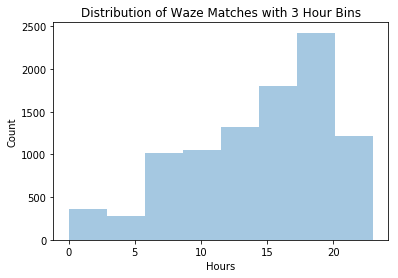

In [8]:
sns.distplot(df['HOUR'],kde=False,bins=8)
plt.xlabel("Hours")
plt.ylabel("Count")
plt.title('Distribution of Waze Matches with 3 Hour Bins')

# Seperating the data into 3 hour bins

In [10]:
df_0_3 = df[(df['HOUR'] >= 0) & (df['HOUR'] < 3)]
print('00:00-02:59', len(df_0_3))
df_3_6 = df[(df['HOUR'] >= 3) & (df['HOUR'] < 6)]
print('03:00-05:59', len(df_3_6))
df_6_9 = df[(df['HOUR'] >= 6) & (df['HOUR'] < 9)]
print('06:00-08:59', len(df_6_9))
df_9_12 = df[(df['HOUR'] >= 9) & (df['HOUR'] < 12)]
print('09:00-11:59', len(df_9_12))
df_12_15 = df[(df['HOUR'] >= 12) & (df['HOUR'] < 15)]
print('12:00-14:59', len(df_12_15))
df_15_18 = df[(df['HOUR'] >= 15) & (df['HOUR'] < 18)]
print('15:00-17:59', len(df_15_18))
df_18_21 = df[(df['HOUR'] >= 18) & (df['HOUR'] < 21)]
print('18:00-20:59', len(df_18_21))
df_21_24 = df[(df['HOUR'] >= 21) & (df['HOUR'] < 24)]
print('21:00-23:59', len(df_21_24))

df_0_3.to_csv(r'C:\Users\Panji\Documents\Python Scripts\Non-Jupyter Py Scripts\DOTr\data\Contribution of Waze\FOR GIS\0_3.csv')
df_3_6.to_csv(r'C:\Users\Panji\Documents\Python Scripts\Non-Jupyter Py Scripts\DOTr\data\Contribution of Waze\FOR GIS\3_6.csv')
df_6_9.to_csv(r'C:\Users\Panji\Documents\Python Scripts\Non-Jupyter Py Scripts\DOTr\data\Contribution of Waze\FOR GIS\6_9.csv')
df_9_12.to_csv(r'C:\Users\Panji\Documents\Python Scripts\Non-Jupyter Py Scripts\DOTr\data\Contribution of Waze\FOR GIS\9_12.csv')
df_12_15.to_csv(r'C:\Users\Panji\Documents\Python Scripts\Non-Jupyter Py Scripts\DOTr\data\Contribution of Waze\FOR GIS\12_15.csv')
df_15_18.to_csv(r'C:\Users\Panji\Documents\Python Scripts\Non-Jupyter Py Scripts\DOTr\data\Contribution of Waze\FOR GIS\15_18.csv')
df_18_21.to_csv(r'C:\Users\Panji\Documents\Python Scripts\Non-Jupyter Py Scripts\DOTr\data\Contribution of Waze\FOR GIS\18_21.csv')
df_21_24.to_csv(r'C:\Users\Panji\Documents\Python Scripts\Non-Jupyter Py Scripts\DOTr\data\Contribution of Waze\FOR GIS\21_24.csv')

00:00-02:59 363
03:00-05:59 281
06:00-08:59 1013
09:00-11:59 1057
12:00-14:59 1318
15:00-17:59 1806
18:00-20:59 2427
21:00-23:59 1217
